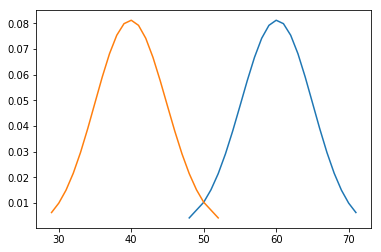

In [118]:
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np
import math

trials = 100
prob_two_point = 0.6
prob_three_point = 0.4

inputs_two_point = [binom.ppf(x, trials, prob_two_point) for x in np.arange(0, 1, 0.01)]
inputs_three_point = [binom.ppf(x, trials, prob_three_point) for x in np.arange(0, 1, 0.01)]
pdf_two_point = [binom.pmf(x, trials, prob_two_point) for x in inputs_two_point]
pdf_three_point = [binom.pmf(x, trials, prob_three_point) for x in inputs_three_point]
plt.plot(inputs_two_point[1:], pdf_two_point[1:])
plt.plot(inputs_three_point[1:], pdf_three_point[1:])

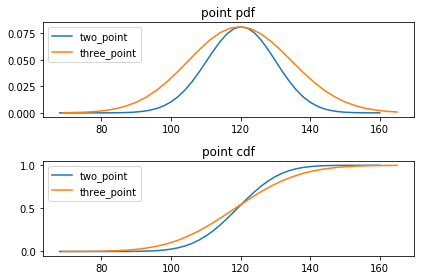

In [119]:
trials = 100
prob_two_point = 0.6
prob_three_point = 0.4

fig, axs = plt.subplots(2, 1)

shot_attempts = list(range(101))
points_twos = [2*s for s in shot_attempts]
points_threes = [3*s for s in shot_attempts]
pdf_two_point = [binom.pmf(x, trials, prob_two_point) for x in shot_attempts]
pdf_three_point = [binom.pmf(x, trials, prob_three_point) for x in shot_attempts]
axs[0].plot(points_twos[34:-20], pdf_two_point[34:-20], label='two_point')
axs[0].plot(points_threes[23:-45], pdf_three_point[23:-45], label='three_point')
axs[0].legend(loc='upper left')
axs[0].set_title('point pdf')

cdf_two_point = [binom.cdf(x, trials, prob_two_point) for x in shot_attempts]
cdf_three_point = [binom.cdf(x, trials, prob_three_point) for x in shot_attempts]
axs[1].plot(points_twos[34:-20], cdf_two_point[34:-20], label='two_point')
axs[1].plot(points_threes[23:-45], cdf_three_point[23:-45], label='three_point')
axs[1].legend(loc='upper left')
axs[1].set_title('point cdf')
plt.tight_layout()

In [120]:
def game_outcome_probabilities(shot_attempts, prob_three, prob_two):
    """probability of a three point only shooting team beating a two point only 
    shooting team x_N_pt = number of baskets made for the N point shooting team
    Prob(three_point_team_wins) =
    Prob(two_point_team_points < three_point_team_points) = 
    P(2*x_two_pt < 3*x_three_pt) =
    P(x_two_pt < 1.5*x_three_pt) =
    Sum[n=0..trials]P(x_two_pt < 1.5*x_three_pt|x_three_pt = n)P(x_three_pt = n)

    Args:
        shot_attempts (int): number of shots taken by each team
        prob_three (float): probability of score for the three point taking team
        prob_two (float): probability of score for the two point taking team

    Returns:
        float: probability that team 3 beats team 2
    """
    prob_three_wins = 0
    prob_tie = 0
    for made_threes in np.arange(shot_attempts + 1):
        prob_made_threes = binom.pmf(made_threes, shot_attempts, prob_three)
        max_two_made_still_lose = math.floor(1.5*made_threes)
        if 2 * max_two_made_still_lose == 3 * made_threes:
            prob_tie = (prob_tie
                        + binom.pmf(max_two_made_still_lose, shot_attempts, prob_two)
                        * prob_made_threes)
            max_two_made_still_lose = max_two_made_still_lose - 1
        if max_two_made_still_lose < 0:
            continue
        two_make_cdf = binom.cdf(max_two_made_still_lose, shot_attempts, prob_two)
        prob_three_wins = prob_three_wins + two_make_cdf * prob_made_threes
        
        res = {'three wins': prob_three_wins, 
               'tie': prob_tie, 
               'two wins': 1 - prob_three_wins - prob_tie}
    return res

In [121]:
game_outcome_probabilities(100, 0.4, 0.6)

{'three wins': 0.48669876602489426,
 'tie': 0.022551579228201415,
 'two wins': 0.49074965474690435}